# Random forest importance

In [2]:
%store -r X
%store -r y
%store -r X_test
%store -r y_test
%store -r feature_names

In [3]:
# Import thư viện
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [4]:
import matplotlib.pyplot as plt

# Reshape data
# Data ban đầu X(13166, 20, 128), y(13166)

# Reshape X về dạng 2d => X_2d(263320, 128), giữ nguyên 128 và đó là các đặc trưng
X_2d = X.reshape(-1, X.shape[-1])
# Reshape y thành y_reshaped(263320) bằng cách lặp mỗi phần tử trong y 20 lần
y_reshaped = np.repeat(y, 20)

In [5]:
# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=500)
# Nó chỉ định số lượng cây quyết định sẽ được xây dựng và kết hợp để tạo thành khu rừng ngẫu nhiên trong thuật toán random forest.

In [6]:
# Huấn luyện mô hình
model.fit(X_2d, y_reshaped)

RandomForestClassifier(n_estimators=500)

In [7]:
# Lấy tầm quan trọng của đặc trưng
feature_importances = model.feature_importances_

# In tầm quan trọng của đặc trưng
print(feature_importances)

[0.0168254  0.01349852 0.01306668 0.01257399 0.01309478 0.01319468
 0.01290872 0.01305256 0.01285035 0.01303917 0.01267488 0.01260438
 0.01998533 0.03105841 0.0341337  0.03053728 0.02439518 0.03538159
 0.02351339 0.02441136 0.01582349 0.01971509 0.01653465 0.01832249
 0.01540028 0.01433003 0.01485231 0.0166393  0.0119697  0.00925498
 0.00822431 0.00536339 0.0051637  0.00488786 0.00427064 0.00464418
 0.0049125  0.00452825 0.00425424 0.00458244 0.00500601 0.00471682
 0.00451009 0.00508719 0.00429091 0.00465509 0.0041538  0.00519308
 0.00422277 0.00514935 0.00395229 0.00444566 0.0050537  0.00566304
 0.00517737 0.00588914 0.00499372 0.00626516 0.00530523 0.00610607
 0.00835092 0.00729577 0.00646071 0.00616039 0.00437553 0.00480561
 0.00507578 0.00412805 0.00480118 0.00466193 0.00510359 0.00461823
 0.00477854 0.00544922 0.00520006 0.00432958 0.00435182 0.00442792
 0.00554388 0.00624681 0.00516465 0.00538237 0.0049149  0.00517107
 0.00503843 0.00480918 0.00356493 0.00389395 0.0035694  0.0038

In [8]:
feature_importances.shape

(128,)

In [9]:
# Tạo dataframe gồm tên đặc trưng và tầm quan trọng
feature_importances_df = pd.DataFrame({"feature_name": feature_names, "importance": feature_importances})

# Sắp xếp dataframe theo tầm quan trọng
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

# Lấy index của dataframe
indices = feature_importances_df.index

# In index
print(indices)

Index([ 17,  14,  13,  15,  19,  16,  18,  12,  21,  23,
       ...
       103, 113,  90, 115, 114, 112,  88,  86, 107, 106],
      dtype='int64', length=128)


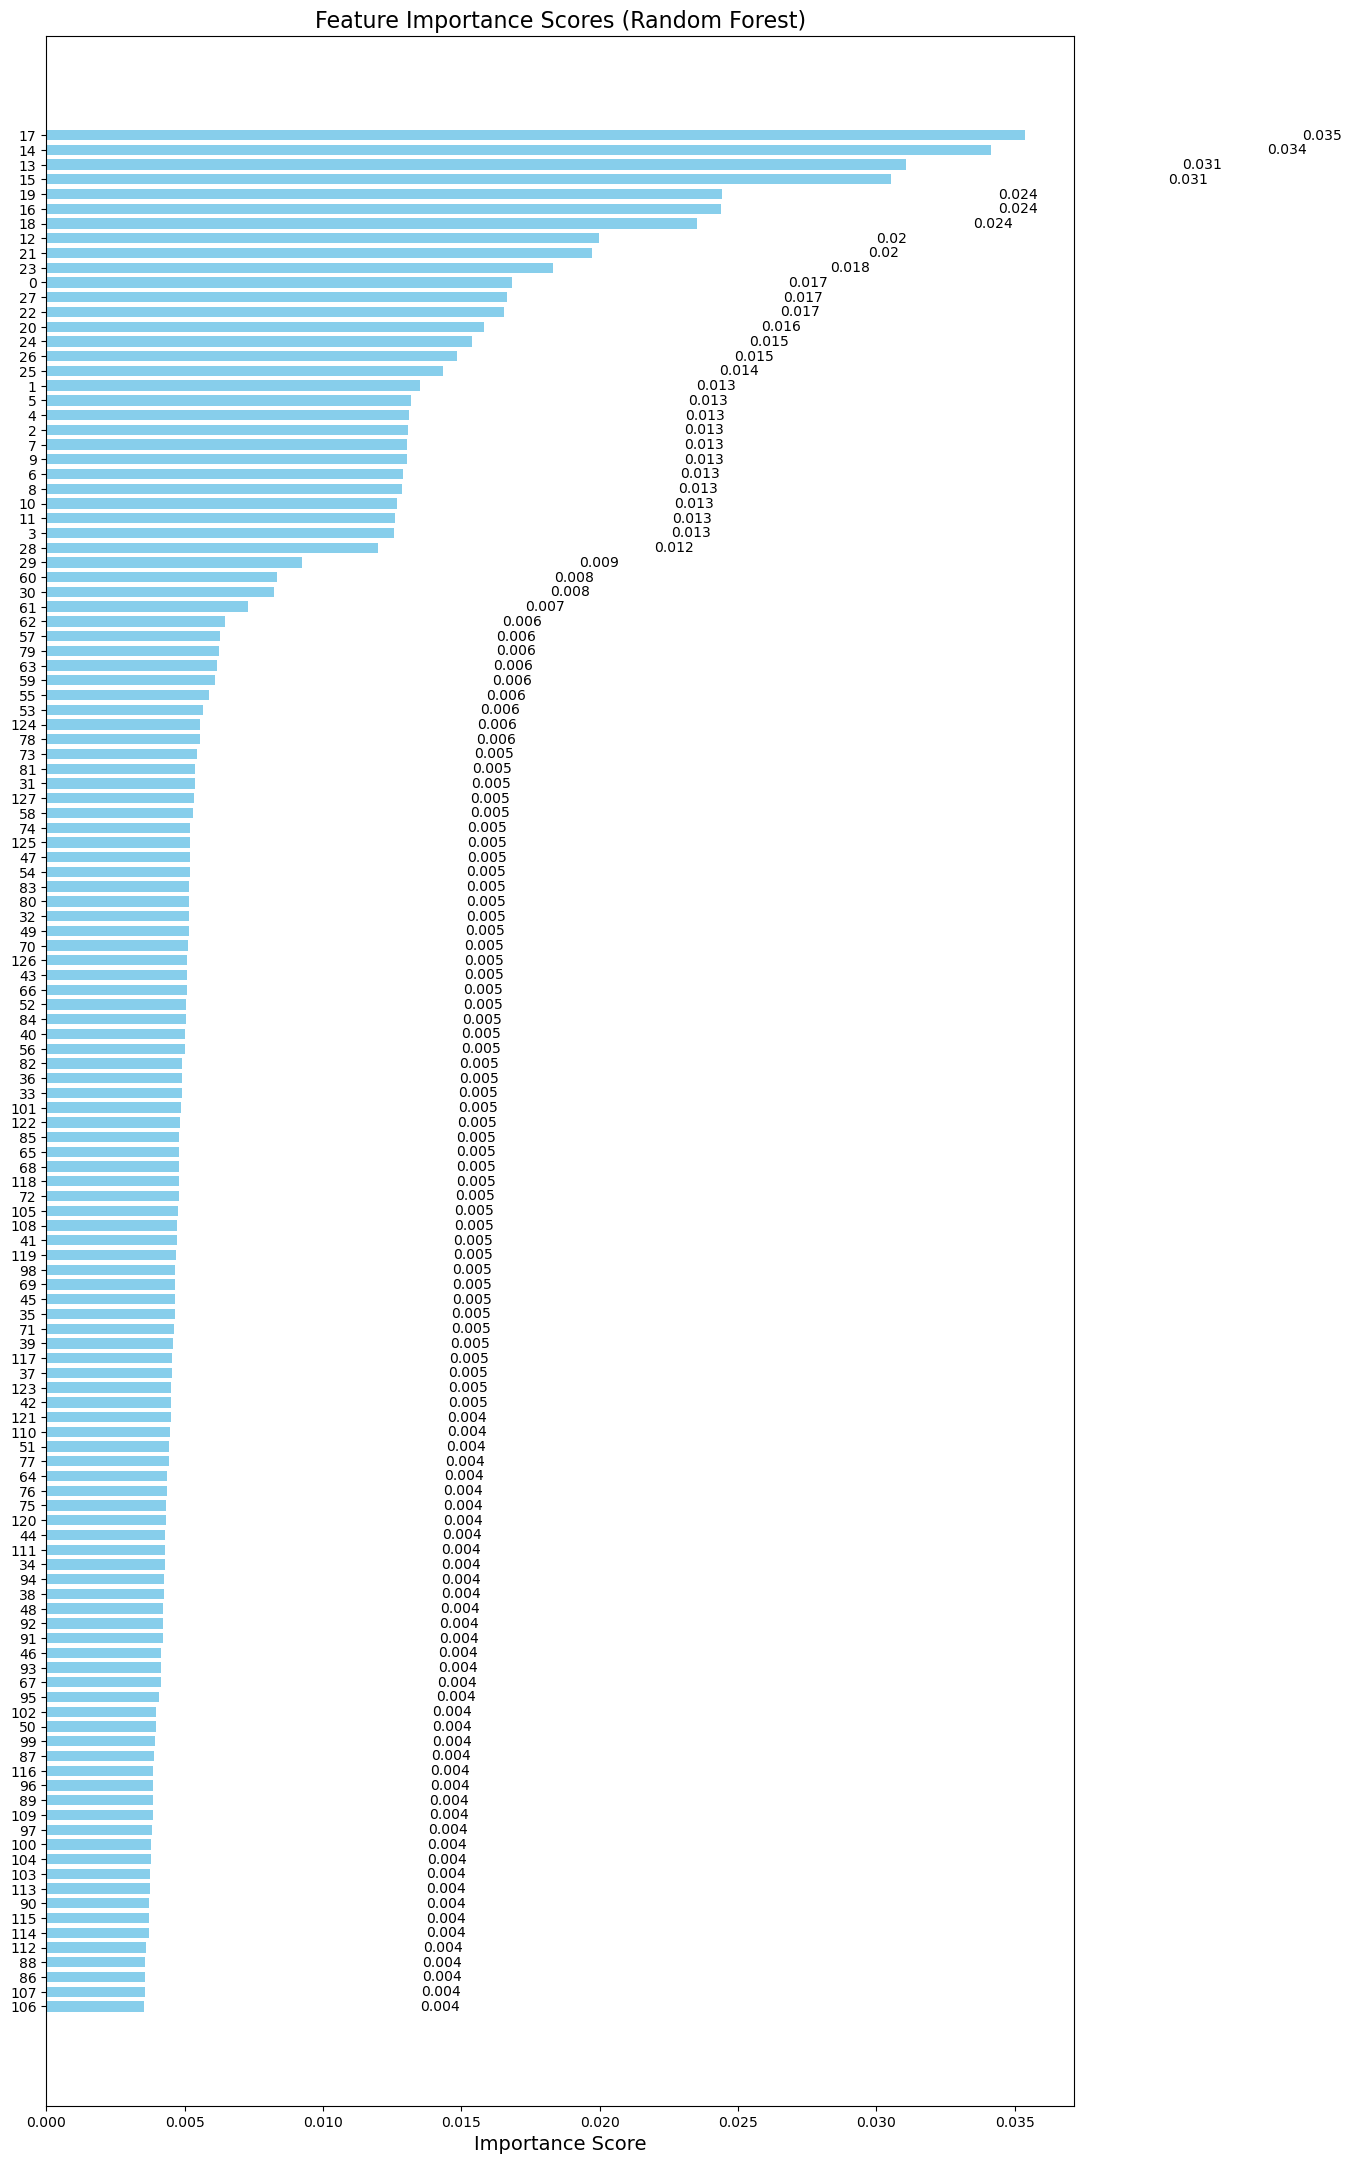

In [41]:
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots(figsize=(14, 22))  # Increase figure size for more space
y_pos = np.arange(len(feature_importances_df))
bar_height = 0.7  # Increase bar height for more space between bars
ax.barh(y_pos, feature_importances_df["importance"], align="center", color='skyblue', height=bar_height)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_importances_df["feature_name"], fontsize=10)  # Reduce font size if necessary
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score", fontsize=14)
ax.set_title("Feature Importance Scores (Random Forest)", fontsize=16)

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate(feature_importances_df["importance"]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="normal", fontsize=10, verticalalignment='center')  # Adjust position and alignment

plt.tight_layout(pad=2.0)  # Add padding for better layout
plt.show()

In [10]:
# Xác định số đặc trưng sẽ giữ lại để train  model
k = 64
top_k_indices = indices[:k]

In [11]:
# Giữ lại k đặc trưng tốt nhất trong tệp dữ liệu ban đầu
selected_X = X[:,:,top_k_indices]
selected_X_test = X_test[:,:,top_k_indices]

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Khởi tạo mô hình
model = keras.Sequential()

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(20, k, 1), padding='same'))

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Flatten để làm phẳng đầu ra của lớp trước khi đi vào các lớp fully connected
model.add(layers.Flatten())

# Thêm lớp fully connected (Dense Layer) với 64 units và hàm kích hoạt ReLU
model.add(layers.Dense(64, activation='relu'))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp fully connected (Dense Layer) cuối cùng với số lớp đầu ra phụ thuộc vào bài toán của bạn
model.add(layers.Dense(5, activation='softmax'))

# In thông tin mô hình
model.summary()

# Biên dịch mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 20, 64, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 64, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 32, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 16, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         327,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 508,261 (1.94 MB)

 Trainable params: 508,261 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(selected_X, y, epochs=10, batch_size=16)

Epoch 1/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.4871 - loss: 1.1958
Epoch 2/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.8162 - loss: 0.5009
Epoch 3/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8510 - loss: 0.4075
Epoch 4/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.8633 - loss: 0.3666
Epoch 5/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.8830 - loss: 0.3290
Epoch 6/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.8958 - loss: 0.2903
Epoch 7/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.8945 - loss: 0.2952
Epoch 8/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.8989 - loss: 0.2875
Epoch 9/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9120 - loss: 0.2580
Epoch 10/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.9091 - loss: 0.2583


In [43]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(selected_X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

# Dự đoán các nhãn trên tập kiểm tra
y_pred = model.predict(selected_X_test)

# Chuyển đổi dự đoán thành nhãn dự đoán (lớp dự đoán)
y_pred_classes = np.argmax(y_pred, axis=1)

# Hiển thị ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_pred_classes)
print("Ma trận nhầm lẫn:")
print(confusion)

# Hiển thị báo cáo phân loại
class_report = classification_report(y_test, y_pred_classes, digits=4)
print("Báo cáo phân loại:")
print(class_report)

412/412 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9361 - loss: 0.1530
Độ chính xác trên tập kiểm tra: 0.9336928725242615
412/412 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1964   24   16   30]
 [   0    9 2644    3  152]
 [   0  292   19 1426    3]
 [   0   19  305    1 3417]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2842
           1     0.8599    0.9656    0.9097      2034
           2     0.8837    0.9416    0.9117      2808
           3     0.9862    0.8195    0.8952      1740
           4     0.9486    0.9131    0.9306      3742

    accuracy                         0.9337     13166
   macro avg     0.9357    0.9280    0.9294     13166
weighted avg     0.9371    0.9337    0.9336     13166



In [46]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def micro_metrics(y_true, y_pred):
  # Calculate micro averages
  micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
      y_true, y_pred.argmax(axis=1), average='micro'
  )
    
  # Macro averages
  macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
      y_true, y_pred.argmax(axis=1), average='macro'
  )
  return {
      'micro_precision': micro_precision,
      'micro_recall': micro_recall,
      'micro_f1': micro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'macro_f1': macro_f1
  }

In [48]:
from tabulate import tabulate
micro_results = micro_metrics(y_test, y_pred)
# Prepare table data
table_data = [
  ["Micro Precision", micro_results['micro_precision']],
  ["Micro Recall", micro_results['micro_recall']],
  ["Micro F1-score", micro_results['micro_f1']],
  ["Macro Precision", micro_results['macro_precision']],
  ["Macro Recall", micro_results['macro_recall']],
  ["Macro F1-score", micro_results['macro_f1']],
]

# Print the table using tabulate
print(tabulate(table_data, headers=["Metric", "Score"]))

Metric              Score
---------------  --------
Micro Precision  0.933693
Micro Recall     0.933693
Micro F1-score   0.933693
Macro Precision  0.935679
Macro Recall     0.927974
Macro F1-score   0.929425
